In [1]:
# import packages
import os
import tarfile
import urllib
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


TEAM_PATH = './resources/scores.csv'

In [2]:
def load_data(path=TEAM_PATH):

    return pd.read_csv(path,header=0)

In [3]:
def scatter_plot(df, label_column):
    sns.set(style="ticks")
    num_cols = df.select_dtypes(include=np.number).columns
    num_cols = [col for col in num_cols if col != label_column]
    
    ncols = 3
    nrows = np.ceil(len(num_cols) / ncols).astype(int)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 7))
    ax = ax.flatten()
    
    for i, col in enumerate(num_cols):
        sns.scatterplot(x=df[col], y=df[label_column], ax=ax[i])
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(label_column)
        
    plt.tight_layout()
    plt.show()

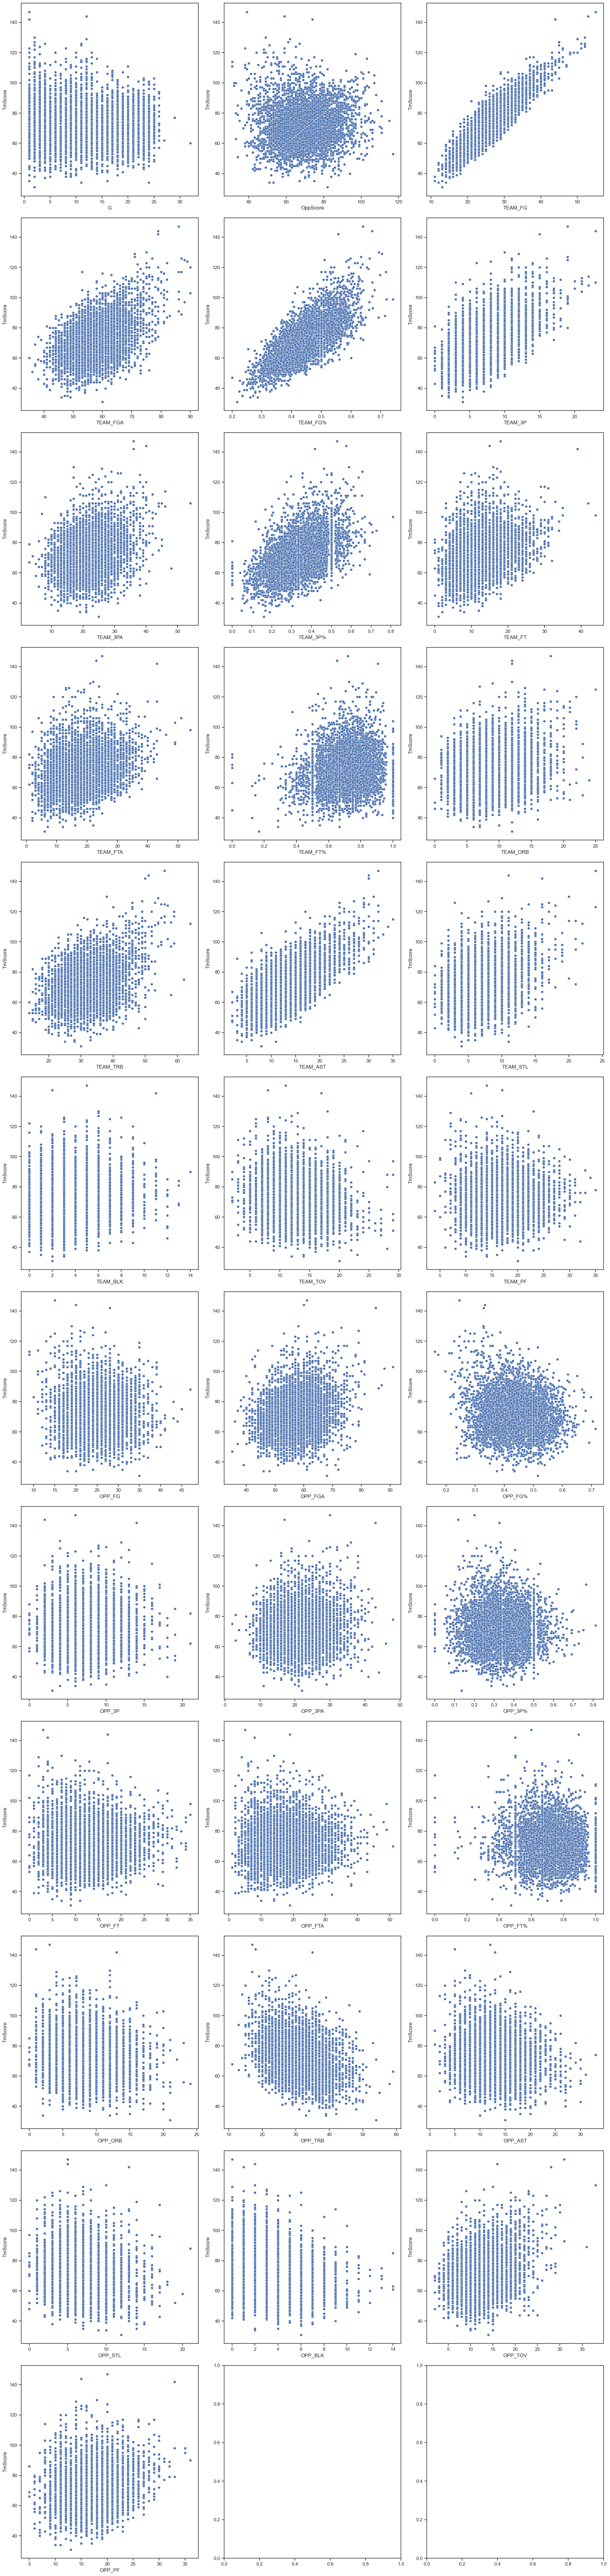

In [4]:
teamData = load_data()
teamData.head()
labels = teamData["TmScore"].copy().values

scatter_plot(teamData, "TmScore")

In [5]:
teamData.corr()

C:\Users\rykun\AppData\Local\Temp\ipykernel_17132\77593277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teamData.corr()


,G,TmScore,OppScore,TEAM_FG,TEAM_FGA,TEAM_FG%,TEAM_3P,TEAM_3PA,TEAM_3P%,TEAM_FT,...,OPP_FT,OPP_FTA,OPP_FT%,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF
G,1.000000,-0.076190,0.067299,-0.094486,-0.125009,-0.011943,-0.035588,-0.066889,0.020086,0.021000,...,0.050743,0.023741,0.070184,-0.018144,-0.008915,0.031580,-0.073753,-0.010511,-0.180816,-0.019092
TmScore,-0.076190,1.000000,0.051613,0.886276,0.464398,0.739248,0.554849,0.269670,0.506851,0.346901,...,0.029893,0.043775,-0.044637,-0.076386,-0.327943,-0.083185,-0.115131,-0.205171,0.261474,0.224313
OppScore,0.067299,0.051613,1.000000,-0.005879,0.140028,-0.097005,0.009901,0.027102,-0.002997,0.126648,...,0.414092,0.364790,0.219407,0.123224,0.290958,0.632475,0.150072,0.138324,-0.208167,0.116119
TEAM_FG,-0.094486,0.886276,-0.005879,1.000000,0.595189,0.779509,0.437625,0.190695,0.417453,-0.069581,...,-0.042668,-0.032713,-0.052987,-0.107645,-0.322155,-0.077603,-0.135136,-0.178199,0.248311,-0.098659
TEAM_FGA,-0.125009,0.464398,0.140028,0.595189,1.000000,-0.027628,0.232102,0.410431,-0.051526,-0.173294,...,0.091509,0.107045,-0.023541,-0.032672,0.213320,0.060330,-0.168845,0.181339,0.266871,-0.169906
TEAM_FG%,-0.011943,0.739248,-0.097005,0.779509,-0.027628,1.000000,0.360451,-0.083929,0.565720,0.048272,...,-0.110152,-0.109698,-0.043246,-0.106501,-0.557594,-0.137593,-0.044312,-0.350664,0.089949,0.012530
TEAM_3P,-0.035588,0.554849,0.009901,0.437625,0.232102,0.360451,1.000000,0.706293,0.727398,-0.096052,...,-0.030391,-0.034433,-0.013431,-0.080705,-0.163622,-0.027362,-0.050097,-0.146361,0.048545,-0.120707
TEAM_3PA,-0.066889,0.269670,0.027102,0.190695,0.410431,-0.083929,0.706293,1.000000,0.073813,-0.129333,...,0.016861,0.015097,0.000312,-0.058440,0.110489,-0.002774,-0.061121,-0.082312,0.081128,-0.126907
TEAM_3P%,0.020086,0.506851,-0.002997,0.417453,-0.051526,0.565720,0.727398,0.073813,1.000000,-0.016214,...,-0.049402,-0.052476,-0.015933,-0.054737,-0.312713,-0.035669,-0.018371,-0.123787,-0.016268,-0.051582
TEAM_FT,0.021000,0.346901,0.126648,-0.069581,-0.173294,0.048272,-0.096052,-0.129333,-0.016214,1.000000,...,0.168351,0.184314,0.003510,0.070919,-0.064190,-0.032062,0.015014,-0.059745,0.113852,0.781741


In [6]:
features = teamData.drop("TmScore",axis=1)
features.drop(columns=['TeamName','Opp','W/L','G','Date','Court'],inplace=True)
for colName, colData in features.items():
    if '%' in colName:
        features.drop(colName, axis=1, inplace=True)
labels = teamData["TmScore"].copy()


In [7]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])
featuresScaled = num_pipeline.fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    featuresScaled, labels, test_size=0.2, random_state=42
)

In [8]:
def plotLearningCurves(model, train_features, test_features, train_labels, test_labels):
    train_sizes, train_scores, test_scores = learning_curve(model, train_features, train_labels,
                                                            cv=5, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    plt.plot(train_sizes, np.sqrt(train_scores_mean), "r-+", linewidth=2, label="train")
    plt.plot(train_sizes, np.sqrt(test_scores_mean), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.title("Learning Curves", fontsize=16)
    plt.show()
    return model

In [ ]:
# Fit the RandomForestRegressor
rf_reg = plotLearningCurves(
    RandomForestRegressor(n_estimators=100, random_state=42),
    train_features, test_features, train_labels, test_labels
)


In [10]:
# Make predictions on the test set
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(train_features,train_labels)



RandomForestRegressor(random_state=42)

In [ ]:
predictions = rf_reg.predict(test_features)
differences = np.array(predictions) - np.array(test_labels)
std_dev = np.std(differences)

print("Standard deviation:", std_dev)

In [11]:
game = [float(score.strip()) for score in '69	22	49	9	23	9	12	8	37	11	3	2	18	24	28	54	4	14	9	22	3	21	16	10	4	9	16'.split()]
game = num_pipeline.transform([game])
rf_reg.predict(game) # actual is 62

C:\Users\rykun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([62.23])

In [ ]:
def predictScore(team1, team2):

    team1 = num_pipeline.transform([team1])

    team2 = num_pipeline.transform([team2])
    
    print(f'Team1: {rf_reg.predict(team1)}')
    print(f'Team2: {rf_reg.predict(team2)}')

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.base")


In [ ]:

msu = {
"team": [25.3,57.3,6.9,18.5,10.7,14.5,9.0,36.6,14.7,4.9,3.0,11.1,16.8,68.1],
"opponent": [23.6,57.6,6.3,21.4,12.1,17.0,8.9,33.1,12.7,5.9,3.8,9.7,15.9,65.6]
}

osu = {
    "team": [28.0,60.4,6.7,18.2,12.5,17.3,11.8,38.5,11.9,5.1,3.7,11.0,16.2,75.0],
    "opponent": [24.7,59.3,6.8,22.0,11.9,16.5,10.1,33.3,12.0,5.0,2.8,11.3,16.5,68.0]
}

averagesMsu = {
   'team': [70.3, 25.0, 58.3, 6.85, 20.25, 11.3, 15.5, 9.55, 34.95, 13.35, 4.95, 2.9, 11.2, 16.65], 
   'opponent': [25.8, 59.0, 6.5, 19.799999999999997, 12.3, 17.15, 10.350000000000001, 35.8, 12.3, 5.5, 3.75, 10.35, 16.05]
   }


averagesOsu = {'team': [68.05,25.8, 59.0, 6.5, 19.799999999999997, 12.3, 17.15, 10.350000000000001, 35.8, 12.3, 5.5, 3.75, 10.35, 16.05], 
               'opponent': [25.0, 58.3, 6.85, 20.25, 11.3, 15.5, 9.55, 34.95, 13.35, 4.95, 2.9, 11.2, 16.65]
}

msu = [70.3, 25.0, 58.3, 6.85, 20.25, 11.3, 15.5, 9.55, 34.95, 13.35, 4.95, 2.9, 11.2, 16.65] + [25.8, 59.0, 6.5, 19.799999999999997, 12.3, 17.15, 10.350000000000001, 35.8, 12.3, 5.5, 3.75, 10.35, 16.05]
osu = [68.05,25.8, 59.0, 6.5, 19.799999999999997, 12.3, 17.15, 10.350000000000001, 35.8, 12.3, 5.5, 3.75, 10.35, 16.05] + [25.0, 58.3, 6.85, 20.25, 11.3, 15.5, 9.55, 34.95, 13.35, 4.95, 2.9, 11.2, 16.65]


predictScore(msu, osu)



In [ ]:
northwestern = {
    "team": np.array([23.6,57.8,7.7,23.9,13.5,18.1,10.4,35.3,13.5,7.9,4.4,10.3,16.0,68.4]),
    "opponent": np.array([21.7,53.6,7.9,22.8,10.9,16.0,9.5,34.9,13.5,4.8,3.6,14.4,17.1,62.1])
}

purdue = {
    "team": np.array([26.2,56.0,7.4,21.7,14.8,19.7,12.4,39.5,15.7,4.7,4.0,11.2,13.2,74.6]),
    "opponent": np.array([24.0,58.6,6.3,20.6,7.2,9.8,8.2,27.5,12.2,5.9,2.8,10.1,18.3,61.6])
}

pAve = {
    "team": (purdue['team'] + northwestern['opponent'])/2,
    "opponent": (purdue['opponent'] + northwestern['team'])/2
}

nwAve = {
     "team": (purdue['opponent'] + northwestern['team'])/2,
    "opponent": (purdue['team'] + northwestern['opponent'])/2
}

print(pAve)
print(nwAve)


pPredict = [68.35, 23.95, 54.8 ,  7.65, 22.25, 12.85, 17.85, 10.95, 37.2 , 14.6 , 4.75,  3.8 , 12.8 , 15.15]  + [23.95, 54.8 ,  7.65, 22.25, 12.85, 17.85, 10.95, 37.2 , 14.6 ,4.75,  3.8 , 12.8 , 15.15]
nwPredict = [68.35, 23.8 , 58.2 ,  7.  , 22.25, 10.35, 13.95,  9.3 , 31.4 , 12.85, 6.9 ,  3.6 , 10.2 , 17.15] + [23.95, 54.8 ,  7.65, 22.25, 12.85, 17.85, 10.95, 37.2 , 14.6 , 4.75,  3.8 , 12.8 , 15.15]

predictScore(pPredict,nwPredict)

In [ ]:
Baylor = '69.2 26.4	59.0	9.2	25.9	17.0	22.7	12.5	36.2	15.2	7.1	2.6	12.0	17.5 24.8	55.8 7.0	21.3	12.5	17.8	9.5	31.5	14.8	6.3	3.0	14.3	19.4'
Tcu = '66.6 28.0	60.8	5.1	17.9	15.5	21.6	11.5	36.2	16.2	8.8	4.9	12.2	15.9 24.5	58.7	6.0	19.8	11.7	17.0	11.2	34.9	13.8	6.5	4.5	16.4	17.1	'
predictScore(Baylor, Tcu)
Michigan = '69.6 26.8	59.3	7.9	22.3	12.7	18.3	8.8	36.1	13.1	4.9	4.4	9.8	15.2 26.0	60.8	7.0	21.9	10.6	15.4	10.0	36.3	12.0	5.0	2.6	10.7	17.0	'
Indiana = '67.3  29.1	58.6	6.3	16.6	12.5	17.8	9.8	37.0	15.9	5.8	5.5	12.1	17.3 24.2	59.1	7.3	22.1	11.6	17.3	10.0	32.6	11.5	7.0	2.8	11.9	16.5	'
predictScore(Michigan, Indiana)
Duke = '63.4 26.0	59.3	6.8	20.8	13.7	18.0	13.4	40.0	14.5	5.7	4.8	12.2	15.5	23.5	57.7	6.1	20.5	10.2	13.3	9.2	31.0	11.5	5.8	3.8	11.6	17.5	'
Virginia = '60.4 24.2	53.0	7.6	20.1	14.0	19.4	8.3	32.5	16.3	6.7	4.4	9.1	14.1  21.8	52.8	7.0	20.6	9.8	13.2	8.4	31.5	11.8	5.0	3.9	12.4	16.7	'
predictScore(Duke,Virginia)
TexasTech = '76.9 26.0	56.3	7.2	21.3	14.7	20.7	10.4	34.8	13.5	7.9	3.0	14.0	15.5 26.6	58.3	7.1	20.2	16.6	22.1	10.7	36.0	17.2	7.8	2.8	14.0	17.4'
KansasState = '74.0 26.6	58.3	7.1	20.2	16.6	22.1	10.7	36.0	17.2	7.8	2.8	14.0	17.4 26.0	56.3	7.2	21.3	14.7	20.7	10.4	34.8	13.5	7.9	3.0	14.0	15.5' 
predictScore(TexasTech, KansasState)
setonHall = '70.2 23.8	54.2	5.8	18.1	15.6	23.1	11.0	35.9	12.2	8.5	4.5	14.1	17.8 23.8	54.0	8.8	26.3	13.9	16.8	7.3	31.7	11.2	5.5	1.5	10.7	16.1'
villanova = '69.1 23.8	54.0	8.8	26.3	13.9	16.8	7.3	31.7	11.2	5.5	1.5	10.7	16.1 23.8	54.2	5.8	18.1	15.6	23.1	11.0	35.9	12.2	8.5	4.5	14.1	17.8'
predictScore(setonHall, villanova)

In [ ]:
from util.util import BetUtil

mdlErr = 1.44
# dBaylor = BetUtil.Distribution(77.55, mdlErr)
# dTcu = BetUtil.Distribution(76.05, mdlErr)

# dMichigan = BetUtil.Distribution(74.97, mdlErr)
# dIndiana = BetUtil.Distribution(76.84, mdlErr)

# dDuke = BetUtil.Distribution(72.94, mdlErr)
# dVirginia = BetUtil.Distribution(69.77, mdlErr)

#Team1: [69.15]
# Team2: [65.01]

# Team1: [68.26]
# Team2: [70.99]

msuDistribution = BetUtil.Distribution(71.76, mdlErr)
osuDistribution = BetUtil.Distribution(70.99, mdlErr)

pDistribution = BetUtil.Distribution(69.15, mdlErr)
nwDistribution = BetUtil.Distribution(65.01, mdlErr)

print(msuDistribution.probGreaterThan(osuDistribution))
print(pDistribution.probGreaterThan(nwDistribution))

print(0.6473239664267709 * 0.9789703030282301)



In [ ]:
BetUtil.Line('+181').toProb()